In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import glob

# Based on the mean of each feature 

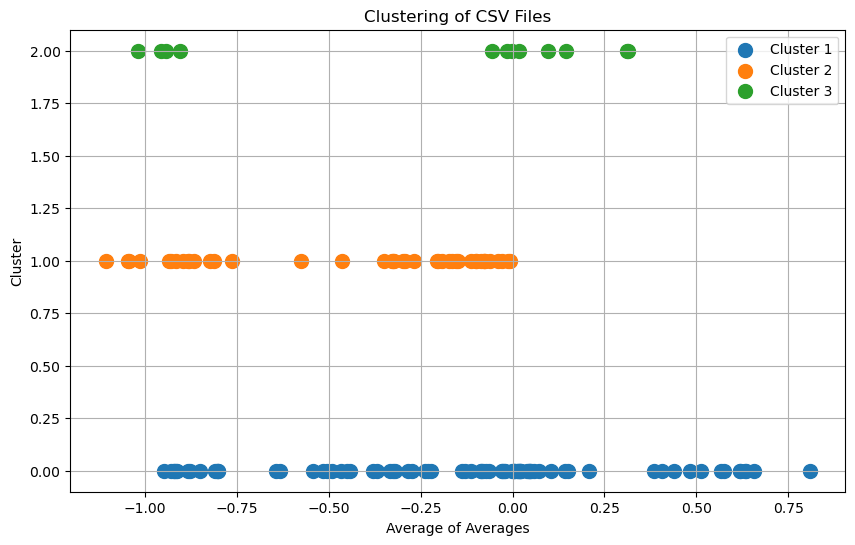

harth2\S006.csv belongs to Cluster 1
harth2\S008.csv belongs to Cluster 1
harth2\S009.csv belongs to Cluster 3
harth2\S010.csv belongs to Cluster 3
harth2\S012.csv belongs to Cluster 1
harth2\S013.csv belongs to Cluster 1
harth2\S014.csv belongs to Cluster 1
harth2\S015.csv belongs to Cluster 1
harth2\S016.csv belongs to Cluster 1
harth2\S017.csv belongs to Cluster 1
harth2\S018.csv belongs to Cluster 1
harth2\S019.csv belongs to Cluster 1
harth2\S020.csv belongs to Cluster 1
harth2\S021.csv belongs to Cluster 1
harth2\S022.csv belongs to Cluster 1
harth2\S023.csv belongs to Cluster 2
harth2\S024.csv belongs to Cluster 2
harth2\S025.csv belongs to Cluster 2
harth2\S026.csv belongs to Cluster 2
harth2\S027.csv belongs to Cluster 2
harth2\S028.csv belongs to Cluster 2
harth2\S029.csv belongs to Cluster 2


In [29]:
import pandas as pd
import glob
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load all CSV files in the directory into a list of DataFrames
csv_files = glob.glob('harth2/*.csv')

# Initialize a list to store the average feature values for clustering
average_feature_values = []

# Iterate through each CSV file
for csv_file in csv_files:
    if csv_file.endswith('.csv'):
        df = pd.read_csv(csv_file)
        # Extract the values of the specified columns
        features = df[['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z']].values
        # Calculate the average values for each feature
        avg_features = np.mean(features, axis=0)
        # Store the average feature values
        average_feature_values.append(avg_features)

# Convert the list of average feature values into a NumPy array
X = np.array(average_feature_values)

# Perform clustering based on the average feature values
kmeans = KMeans(n_clusters=3)  # Adjust the number of clusters as needed
clusters = kmeans.fit_predict(X)

# Plot the points with different colors based on clustering
plt.figure(figsize=(10, 6))
for i in range(3):
    plt.scatter(X[clusters == i], np.full_like(X[clusters == i], i), s=100, label=f'Cluster {i + 1}')

plt.title('Clustering of CSV Files')
plt.xlabel('Average of Averages')
plt.ylabel('Cluster')
plt.legend()
plt.grid(True)
plt.show()

# Print the cluster each CSV belongs to
for i, csv_file in enumerate(csv_files):
    if csv_file.endswith('.csv'):
        print(f"{csv_file} belongs to Cluster {clusters[i] + 1}")


In [44]:
import pandas as pd
from sklearn.cluster import KMeans
import os

# Function to read CSV files from a directory and perform clustering
def cluster_csv_files(directory):
    for filename in os.listdir(directory):
        if filename.endswith(".csv"):
            filepath = os.path.join(directory, filename)
            df = pd.read_csv(filepath)
            # Assuming your CSV files have the columns: time_only, back_x, back_y, back_z, thigh_x, thigh_y, thigh_z
            X = df[['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z']].values
            # Scale the data if necessary
            # Perform KMeans clustering
            kmeans = KMeans(n_clusters=3)
            kmeans.fit(X)
            # Assign cluster labels to the DataFrame
            df['cluster'] = kmeans.labels_
            # Determine the majority cluster
            majority_cluster = df['cluster'].value_counts().idxmax()
            # Assign all rows of the CSV to the majority cluster
            df['cluster'] = majority_cluster
            # Print the cluster the CSV belongs to
            print(f"{filename} belongs to cluster: {majority_cluster}")
            # You can save the clustered DataFrame to a new CSV file or process further
            # For example:
            # clustered_filepath = os.path.join(directory, f"clustered_{filename}")
            # df.to_csv(clustered_filepath, index=False)
            print(f"Clustered {filename} successfully.")

cluster_csv_files("harth2")

S006.csv belongs to cluster: 3
Clustered S006.csv successfully.
S008.csv belongs to cluster: 2
Clustered S008.csv successfully.
S009.csv belongs to cluster: 3
Clustered S009.csv successfully.
S010.csv belongs to cluster: 1
Clustered S010.csv successfully.
S012.csv belongs to cluster: 0
Clustered S012.csv successfully.
S013.csv belongs to cluster: 3
Clustered S013.csv successfully.
S014.csv belongs to cluster: 3
Clustered S014.csv successfully.
S015.csv belongs to cluster: 0
Clustered S015.csv successfully.
S016.csv belongs to cluster: 0
Clustered S016.csv successfully.
S017.csv belongs to cluster: 0
Clustered S017.csv successfully.
S018.csv belongs to cluster: 1
Clustered S018.csv successfully.
S019.csv belongs to cluster: 2
Clustered S019.csv successfully.
S020.csv belongs to cluster: 0
Clustered S020.csv successfully.
S021.csv belongs to cluster: 1
Clustered S021.csv successfully.
S022.csv belongs to cluster: 1
Clustered S022.csv successfully.
S023.csv belongs to cluster: 1
Clustered

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import os
import matplotlib.pyplot as plt

# Function to read CSV files from a directory, perform clustering, and plot the results
def cluster_and_plot_csv_files(directory):
    clusters = {}
    for filename in os.listdir(directory):
        if filename.endswith(".csv"):
            filepath = os.path.join(directory, filename)
            df = pd.read_csv(filepath)
            X = df[['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z']].values
            kmeans = KMeans(n_clusters=3)
            kmeans.fit(X)
            df['cluster'] = kmeans.labels_
            majority_cluster = df['cluster'].value_counts().idxmax()
            clusters[filename] = (X, kmeans.labels_)

    # Plot the CSV files with different colors for each cluster
    plt.figure(figsize=(10, 6))
    for filename, (X, labels) in clusters.items():
        for cluster_id in range(3):
            cluster_points = X[labels == cluster_id]
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_id}', alpha=0.5)
    plt.title('Clustering of CSV Files')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

cluster_and_plot_csv_files("harth2")

# hierarchical clustering 

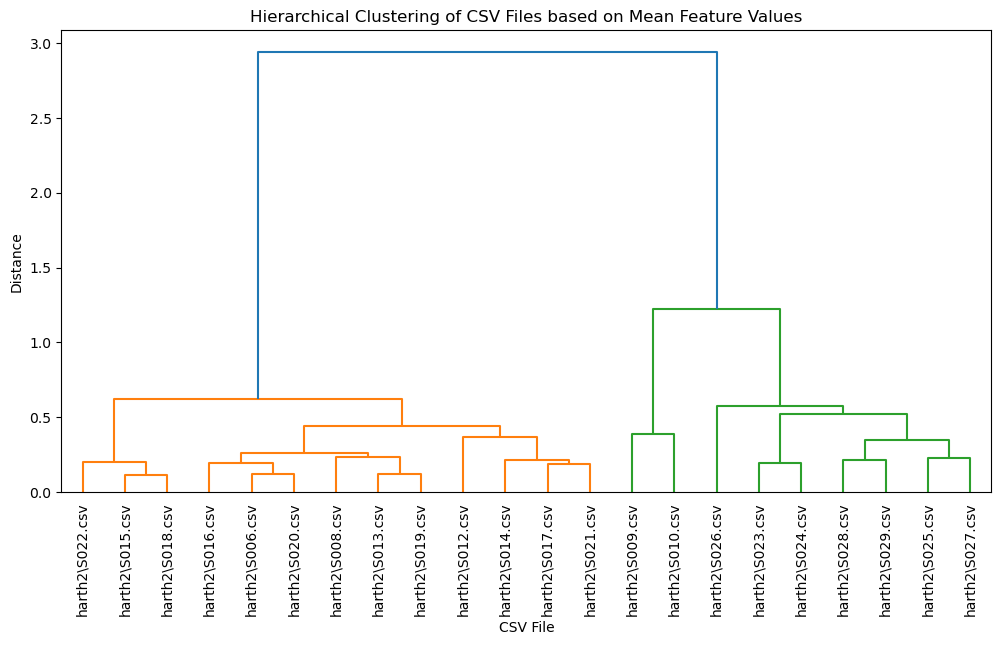

In [40]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Load all CSV files in the directory into a list of DataFrames
csv_files = glob.glob('harth2/*.csv')

# Initialize a list to store the mean values of the six features for each time series
mean_values = []

# Iterate through each CSV file
for csv_file in csv_files:
    if csv_file.endswith('.csv'):
        df = pd.read_csv(csv_file)
        # Extract the values of the specified columns
        features = df[['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z']].values
        # Calculate the mean values for each feature
        mean_feature_values = np.mean(features, axis=0)
        # Store the mean values
        mean_values.append(mean_feature_values)

# Convert the list of mean values into a NumPy array
X = np.array(mean_values)

# Perform hierarchical clustering
Z = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z, labels=csv_files, leaf_rotation=90)
plt.title('Hierarchical Clustering of CSV Files based on Mean Feature Values')
plt.xlabel('CSV File')
plt.ylabel('Distance')
plt.show()

C:\Users\evage\AppData\Local\Temp\ipykernel_24900\2656461173.py:34: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distances, method='ward')


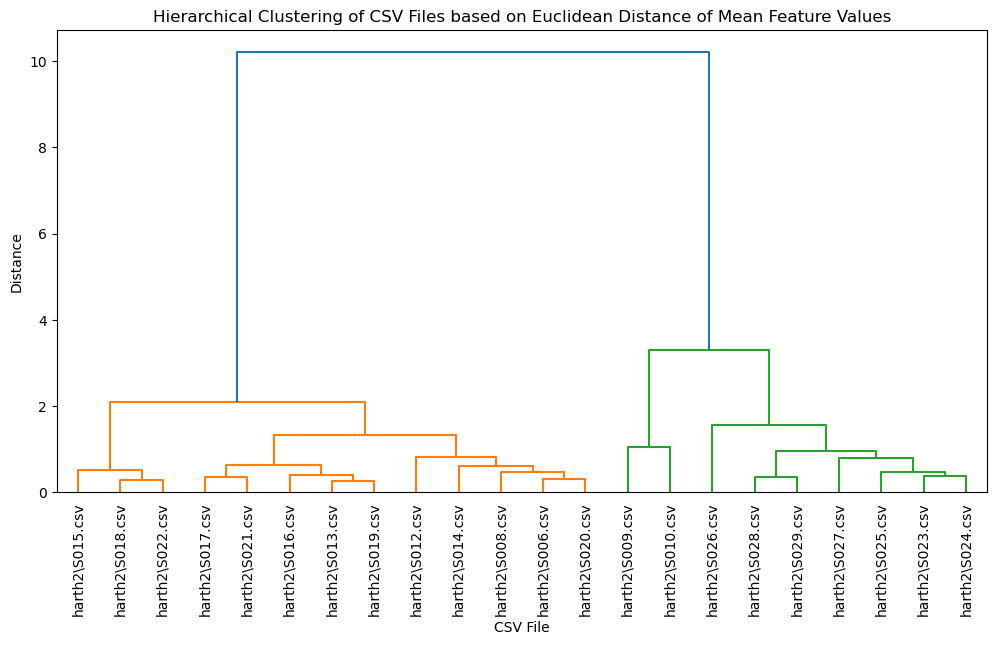

In [41]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Load all CSV files in the directory into a list of DataFrames
csv_files = glob.glob('harth2/*.csv')

# Initialize a list to store the mean values of the six features for each time series
mean_values = []

# Iterate through each CSV file
for csv_file in csv_files:
    if csv_file.endswith('.csv'):
        df = pd.read_csv(csv_file)
        # Extract the values of the specified columns
        features = df[['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z']].values
        # Calculate the mean values for each feature
        mean_feature_values = np.mean(features, axis=0)
        # Store the mean values
        mean_values.append(mean_feature_values)

# Convert the list of mean values into a NumPy array
X = np.array(mean_values)

# Compute pairwise Euclidean distances between mean feature values
distances = np.zeros((len(X), len(X)))
for i in range(len(X)):
    for j in range(len(X)):
        distances[i, j] = np.linalg.norm(X[i] - X[j])

# Perform hierarchical clustering
Z = linkage(distances, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z, labels=csv_files, leaf_rotation=90)
plt.title('Hierarchical Clustering of CSV Files based on Euclidean Distance of Mean Feature Values')
plt.xlabel('CSV File')
plt.ylabel('Distance')
plt.show()


# DB SCAN 